In [1]:
# Creating data frame
import pandas as pd
import numpy as np

# pd.DataFrame(data, index, columns)

In [2]:
a= {'Name':['jack','sam','radha', 'mrinal','amit'],
   'Age':[21,30,24,-31,np.nan]}
df=pd.DataFrame(a,columns=['Name','Age'])
df.head()

,Name,Age
0,jack,21.0
1,sam,30.0
2,radha,24.0
3,mrinal,-31.0
4,amit,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    5 non-null      object 
 1   Age     4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 208.0+ bytes


In [4]:
df.isnull().sum()

Name    0
Age     1
dtype: int64

In [5]:
# amking age to positve 
df['Age']=df['Age'].abs()

In [6]:
# Missing value imputation
df['Age']=df['Age'].fillna(df.Age.mean())

In [7]:
l=[1,5,2,6]
print(l)

[1, 5, 2, 6]


In [8]:
l.sort()
print(l)

[1, 2, 5, 6]


In [9]:
# l.pop--- Indexing last element 
last=(l.pop())

In [10]:
c=range(0,(last+1))
print(c)

range(0, 7)


In [11]:
e=[]
for i in c:
    e.append(i+1)
    
print(e)
    

[1, 2, 3, 4, 5, 6, 7]


In [12]:
print(l), print(e)

[1, 2, 5]
[1, 2, 3, 4, 5, 6, 7]


(None, None)

In [13]:
list1=[1,2,3,4,5,6]
list2=[5,6,7,8,9,9]



In [14]:
# find the common elements 
common=[]
for i in list1:
    if i in list2:
        common.append(i)
        
    

In [15]:
common

[5, 6]

In [16]:
no_match=[]
for i in e:
    if i not in l:
        no_match.append(i)

In [17]:
no_match

[3, 4, 6, 7]

In [18]:
[x for x in range(0,20) if x%2==0]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [19]:
# Creating Random data frame
df=pd.DataFrame(np.random.randn(110,7),columns=list('ABCDEFG'))
df.head()

,A,B,C,D,E,F,G
0,1.865218,1.631483,0.791887,-0.040775,0.969393,-0.048510,0.793747
1,-0.220620,-0.165584,0.649839,-0.514585,-1.063507,-1.529167,-1.504340
2,-2.017825,1.638837,0.184978,-0.384640,2.141585,-1.549285,-0.999565
3,0.003369,1.423315,-0.662987,-0.715701,-1.538087,0.626906,-1.400248
4,-1.993489,-0.401440,-0.166187,0.241226,0.610880,0.203104,-1.585073


In [20]:
df=df.abs()
df.head()

,A,B,C,D,E,F,G
0,1.865218,1.631483,0.791887,0.040775,0.969393,0.048510,0.793747
1,0.220620,0.165584,0.649839,0.514585,1.063507,1.529167,1.504340
2,2.017825,1.638837,0.184978,0.384640,2.141585,1.549285,0.999565
3,0.003369,1.423315,0.662987,0.715701,1.538087,0.626906,1.400248
4,1.993489,0.401440,0.166187,0.241226,0.610880,0.203104,1.585073


In [21]:
df.shape

(110, 7)

In [22]:
df.isnull().sum()

A    0
B    0
C    0
D    0
E    0
F    0
G    0
dtype: int64

# Outlier removal

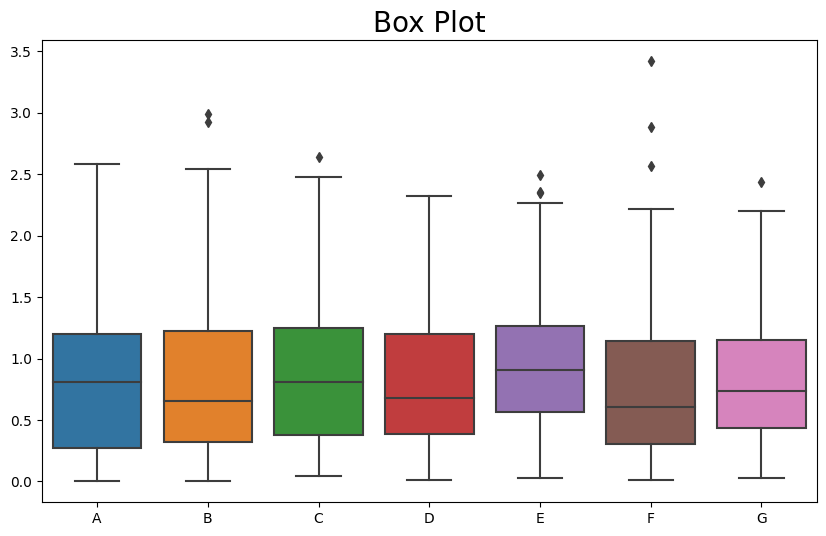

In [23]:
#pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title("Box Plot",fontsize=20)
sns.boxplot(df)
plt.show()

In [24]:
#outlier removal
q1= df['A'].quantile(0.25)
q3=df['A'].quantile(0.75)
print(q1,q3)

0.27512772167958044 1.202255772397244


In [25]:
q11=np.percentile(df.A,25)
print(q11)

0.27512772167958044


In [26]:
# IQR
iqr=q3-q1
print(iqr)

0.9271280507176636


In [27]:
# 
ub=q3+1.5*(iqr)
lb=q1-1.5*(iqr)

print(lb,ub)

-1.115564354396915 2.5929478484737394


In [28]:
# Now outlier removal
df['A']=np.where(df['A']>ub,ub,df['A'])
#

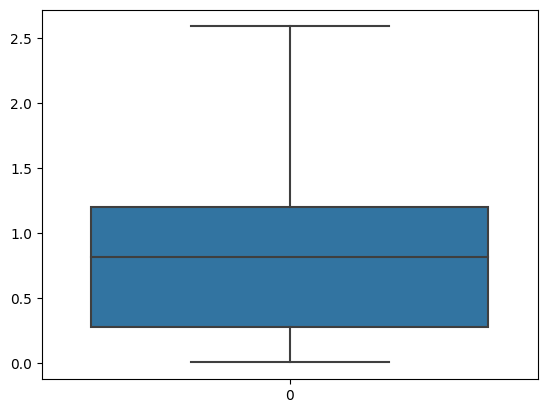

In [29]:
sns.boxplot(df['A'])
plt.show()

In [30]:
outliers=[]
def outlier_detection(data):
    thres=3
    mean=np.mean(data)
    std=np.std(data)
    print(mean,std)
    for i in data:
        z_score=(i-mean)/std
        if (np.abs(z_score)>thres):
            outliers.append(i)

            
            
    return outliers
    

In [31]:
sample=outlier_detection(df['A'])

0.8438099505799442 0.6235648554997781


# Correlation 

In [32]:
df.corr()

,A,B,C,D,E,F,G
A,1.000000,0.051087,-0.186823,-0.127119,-0.125077,-0.049500,-0.035942
B,0.051087,1.000000,0.046426,-0.044407,0.049445,0.115176,-0.078805
C,-0.186823,0.046426,1.000000,0.055636,0.033021,-0.070606,-0.102582
D,-0.127119,-0.044407,0.055636,1.000000,-0.067562,-0.067390,-0.000623
E,-0.125077,0.049445,0.033021,-0.067562,1.000000,-0.038363,-0.084535
F,-0.049500,0.115176,-0.070606,-0.067390,-0.038363,1.000000,-0.011157
G,-0.035942,-0.078805,-0.102582,-0.000623,-0.084535,-0.011157,1.000000


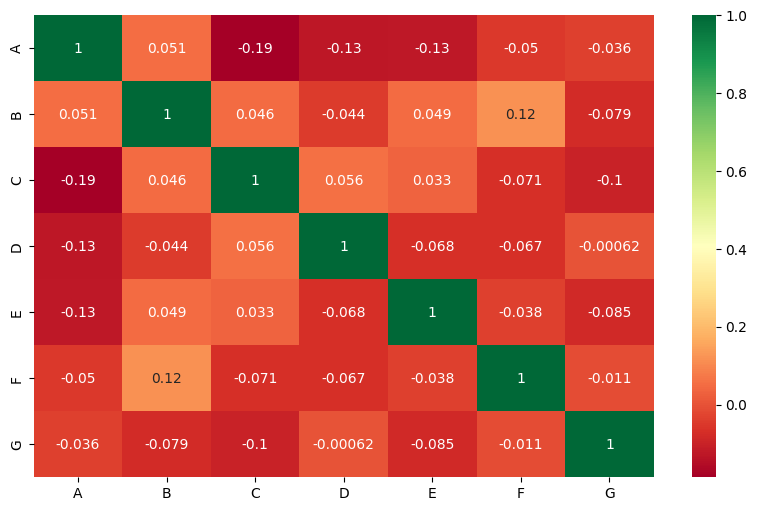

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot = True, cmap = "RdYlGn")
plt.show()

# Standarization splitting of data

In [34]:
train=df.drop('G',axis=1)
test=df['G']



In [35]:
#!pip install scikit-learn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train,test,test_size=0.25,random_state=0)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_sc=scaler.fit_transform(X_train)

X_test_sc=scaler.transform(X_test)

# Building MLR Model 

In [43]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_sc,y_train)

LinearRegression()

In [45]:
y_pred= lr.predict(X_test_sc)
y_pred

array([0.57796939, 0.71161536, 0.59366309, 0.3692372 , 0.72014437,
       0.5484535 , 0.83509259, 0.66844521, 0.56047984, 0.86086636,
       0.80059161, 0.64615614, 1.02592529, 0.97234667, 0.56659305,
       0.87154532, 0.69201901, 0.64043558, 0.97210725, 0.64411787,
       0.96557503, 0.72322895, 0.89075558, 0.76392435, 0.59180975,
       0.75270386, 0.98920721, 0.56574902])

### Evaluation metrix

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
mse= mean_squared_error(y_test,y_pred)
rmse=sqrt(mse)
print('The rmse:', rmse)
mae=mean_absolute_error(y_test,y_pred)
print("mae:",mae)

The rmse: 0.5555522670352865
mae: 0.47689518206348275


In [52]:
print(lr.score(X_test_sc,y_test))
print(lr.score(X_train_sc,y_train))

-0.3029200883592791
0.06210937798002025
